In [ ]:
# Obtén K-clusters del conjunto de datos mb mediante el método de las K-medias
# Obtén K-clusters pero del conjunto de datos mb_PC que has obtenido 
# en el Ejercicio 1 después de aplicar el PCA

In [ ]:
# cargar librerÌas-----------------------------------------------
import pandas as pd
import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import io

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# cargar base----------------------------------------------------

url = 'https://raw.githubusercontent.com/ninelUNIR/ejemplos/main/mb.csv'
mb = pd.read_csv(url)

# info de la base------------------------------------------------
print(mb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alanine                1175 non-null   float64
 1   creatin.phosphate      1175 non-null   float64
 2   creatine               1175 non-null   float64
 3   cysteine               1175 non-null   float64
 4   glutamine              1175 non-null   float64
 5   n.acetylglutamine      1175 non-null   float64
 6   proline                1175 non-null   float64
 7   tryptophan             1175 non-null   float64
 8   tyrosine               1175 non-null   float64
 9   isoleucine             1175 non-null   float64
 10  leucine                1175 non-null   float64
 11  valine                 1175 non-null   float64
 12  fa.ch2ch2co            1175 non-null   float64
 13  fa.ch2ch3              1175 non-null   float64
 14  fa.ch2n                1175 non-null   float64
 15  fa.c

In [ ]:
# definir ajuste Kmedias para la base mb-------------------------
kmedias_k_mb = [KMeans(n_clusters = k, random_state = 3, 
n_init = 10).fit(mb)
                for k in range(2, 26)]
inercias_mb = [model.inertia_ for model in kmedias_k_mb]

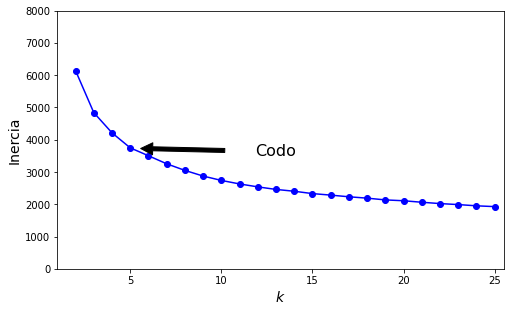

In [ ]:
# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 26), inercias_mb, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inercias_mb[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.2)
            )
plt.axis([1, 25.5, 0, 8000])
plt.show()

In [ ]:
# definir ajuste Kmedias con K = 5-------------------------------
kmedias_5_mb = KMeans(n_clusters = 5, 
random_state = 3, n_init = 10).fit(mb)
y_pred = kmedias_5_mb.fit_predict(mb)
# clases del clustering------------------------------------------
unique, counts = np.unique(y_pred, return_counts = True)
dict(zip(unique, counts))
# clases reales--------------------------------------------------

{0: 368, 1: 218, 2: 145, 3: 25, 4: 419}

In [ ]:
# se aplica el PCA con sklearn-----------------------------------
from sklearn.decomposition import PCA
# crear clase PCA con 7 componentes------------------------------
pca_7 = PCA(n_components = 7)
# obtener la proyeccion de la matriz mb en las com principales---
mb_PC_7 = pca_7.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC_7.shape

(1175, 7)

In [ ]:
# representacion conjunto de datos en componentes principales----
mb_PC_7_df = pd.DataFrame(data = mb_PC_7,
columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_7_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.306603 -0.034829  0.229271 -0.451673  0.280762 -0.211499 -0.170963
1  0.081369 -1.001265 -0.069101 -0.164533  0.321772 -0.220162  0.046287
2  4.451763 -2.034792 -1.154947  0.372276 -0.755619  0.136554  0.365416
3  2.773560  5.209073 -0.228254 -0.382472 -0.208599 -0.044343 -1.104811
4  0.399323 -0.036426  0.743607  1.228068  0.175580  0.250503 -0.358563


In [ ]:
# definir ajuste Kmedias para la base mb-------------------------
kmedias_k_mb_PC = [KMeans(n_clusters = k, random_state = 3, 
n_init = 10).fit(mb_PC_7_df)
                for k in range(2, 26)]
inercias_mb_PC = [model.inertia_ for model in kmedias_k_mb_PC]

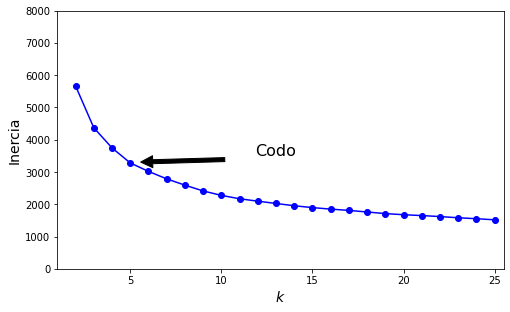

In [ ]:
# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 26), inercias_mb_PC, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inercias_mb_PC[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.2)
            )
plt.axis([1, 25.5, 0, 8000])
plt.show()

In [ ]:
# definir ajuste Kmedias con K = 5-------------------------------
kmedias_5_mb_PC = KMeans(n_clusters = 5, 
random_state = 3, n_init = 10).fit(mb_PC_7_df)
y_pred = kmedias_5_mb_PC.fit_predict(mb_PC_7_df)
# clases del clustering------------------------------------------
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))
# clases reales--------------------------------------------------

{0: 384, 1: 180, 2: 439, 3: 146, 4: 26}

In [ ]:
# Se comprueba que el número de grupos adecuado es el mismo
# para el conjunto de datos original y para el conjunto de datos
# una vez aplicado el análisis de componentes principales, como era de esperar